In [18]:
#pip install eli5

In [19]:
#pip install lime dalex neattext

In [20]:
#pip install seaborn altair streamlit

In [21]:
#pip install scikit-learn

+ Emotion Detection In text
+ Text Classifier

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import neattext.functions as nfx

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Data preparation

In [5]:
df = pd.read_csv("cleaned_dataset_emotions.csv")

In [6]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sadness
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sadness
4,i am a kindergarten teacher and i am thoroughl...,fear


In [8]:
df['label'].value_counts()

label
joy         140779
sadness     120989
anger        57235
fear         47664
love         34497
surprise     14959
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

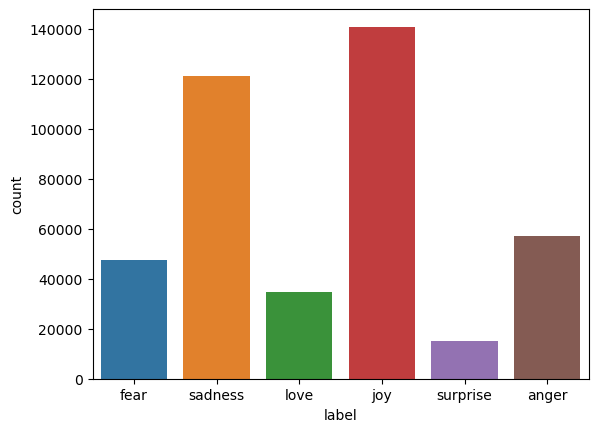

In [11]:
sns.countplot(x='label',data=df)

# Feature Engineering

In [12]:
#Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [14]:
df['Clean_Text'] = df['text'].apply(nfx.remove_userhandles)

In [15]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [16]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

In [17]:
df

,text,label,Clean_Text
0,i just feel really helpless and heavy hearted,fear,feel helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,sadness,ive enjoyed able slouch relax unwind frankly n...
2,i gave up my internship with the dmrg and am f...,fear,gave internship dmrg feeling distraught
3,i dont know i feel so lost,sadness,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,fear,kindergarten teacher thoroughly weary job take...
...,...,...,...
416118,i feel like telling these horny devils to find...,love,feel like telling horny devils find site suite...
416119,i began to realize that when i was feeling agi...,anger,began realize feeling agitated restless though...
416120,i feel very curious be why previous early dawn...,surprise,feel curious previous early dawn time seek tro...
416121,i feel that becuase of the tyranical nature of...,anger,feel becuase tyranical nature government el sa...


In [20]:
# Features & Labels
Xfeatures = df['Clean_Text']
Ylabels = df['label']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,Ylabels,test_size=0.3,random_state=65)

# Build pipeline

In [22]:
from sklearn.pipeline import Pipeline

### LogisticRegression Pipeline

In [23]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=1000))])

In [24]:
#train and fit data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [25]:
#check accuracy
pipe_lr.score(x_test,y_test)

0.8845374368176102

# Test the Model

In [127]:
ex1 = "they're so pretty"

In [128]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [129]:
ex2 = "Why are you so moody today"

In [122]:
pipe_lr.predict([ex2])

array(['joy'], dtype=object)

In [45]:
#prediction prob
pipe_lr.predict_proba([ex1])

array([[0.0119171 , 0.01496671, 0.53285229, 0.18311078, 0.10032502,
        0.14242331, 0.00129425, 0.01311055]])

In [46]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

# Save Model & Pipeline

In [123]:
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_Mar29_2024.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()